# Zadanie: Analiza danych dotyczących Irysów

Zbior danych, ktorym dysponujemy zawiera informacje o trzech gatunkach irysow: Iris setosa, Iris versicolor, i Iris virginica. Dane obejmują pomiary czterech cech: dlugosci i szerokosci dzialki kielicha oraz dlugosci i szerokosc platka kwiatu. Kazdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartosci pomiarow sa podane w centymetrach.

Na poczatek dobrze byloby sie zorientowac, o czym w ogole mowimy. Czym sa owe "irysy"? Otoz **irys** (w jezyku polskim: kosaciec) to roslina ozdobna strefy umiarkowanej, czyli wystepuje rowniez w Polsce. Jest blisko spokrewniona z szafranem, frezja i mieczykiem. Poniewaz jest malo wymagajaca, bardzo latwo ja hodowac. Jest ceniona z powodu swoich ciekawych i efektownych kwiatow. Uzywana m.in. w przemysle perfumeryjnym i ziololecznictwie. Fotografia ponizej pokazuje typowego przedstawiciela gatunku.

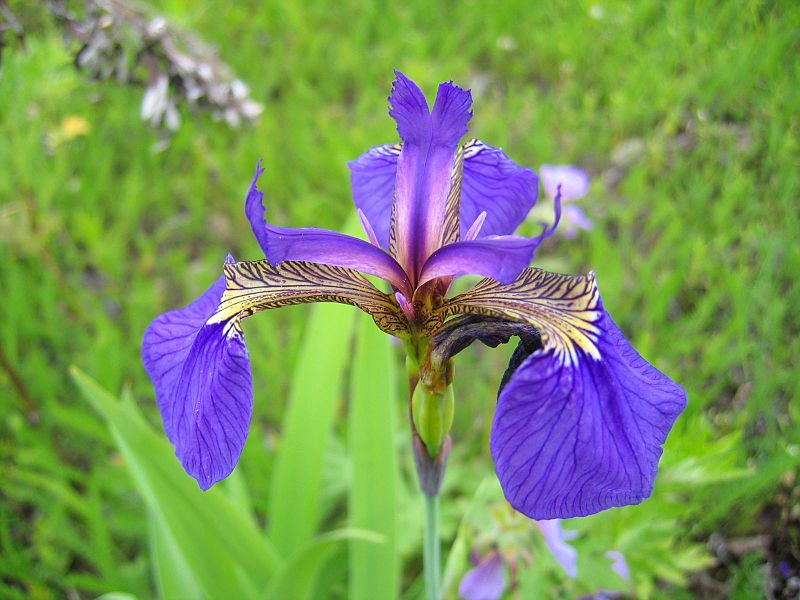

 Na swiecie istnieje kilkaset gatunkow irysa. My dzisiaj zajmiemy sie tylko trzema z nich: **Iris setosa**, **Iris versicolor**, i **Iris virginica**:

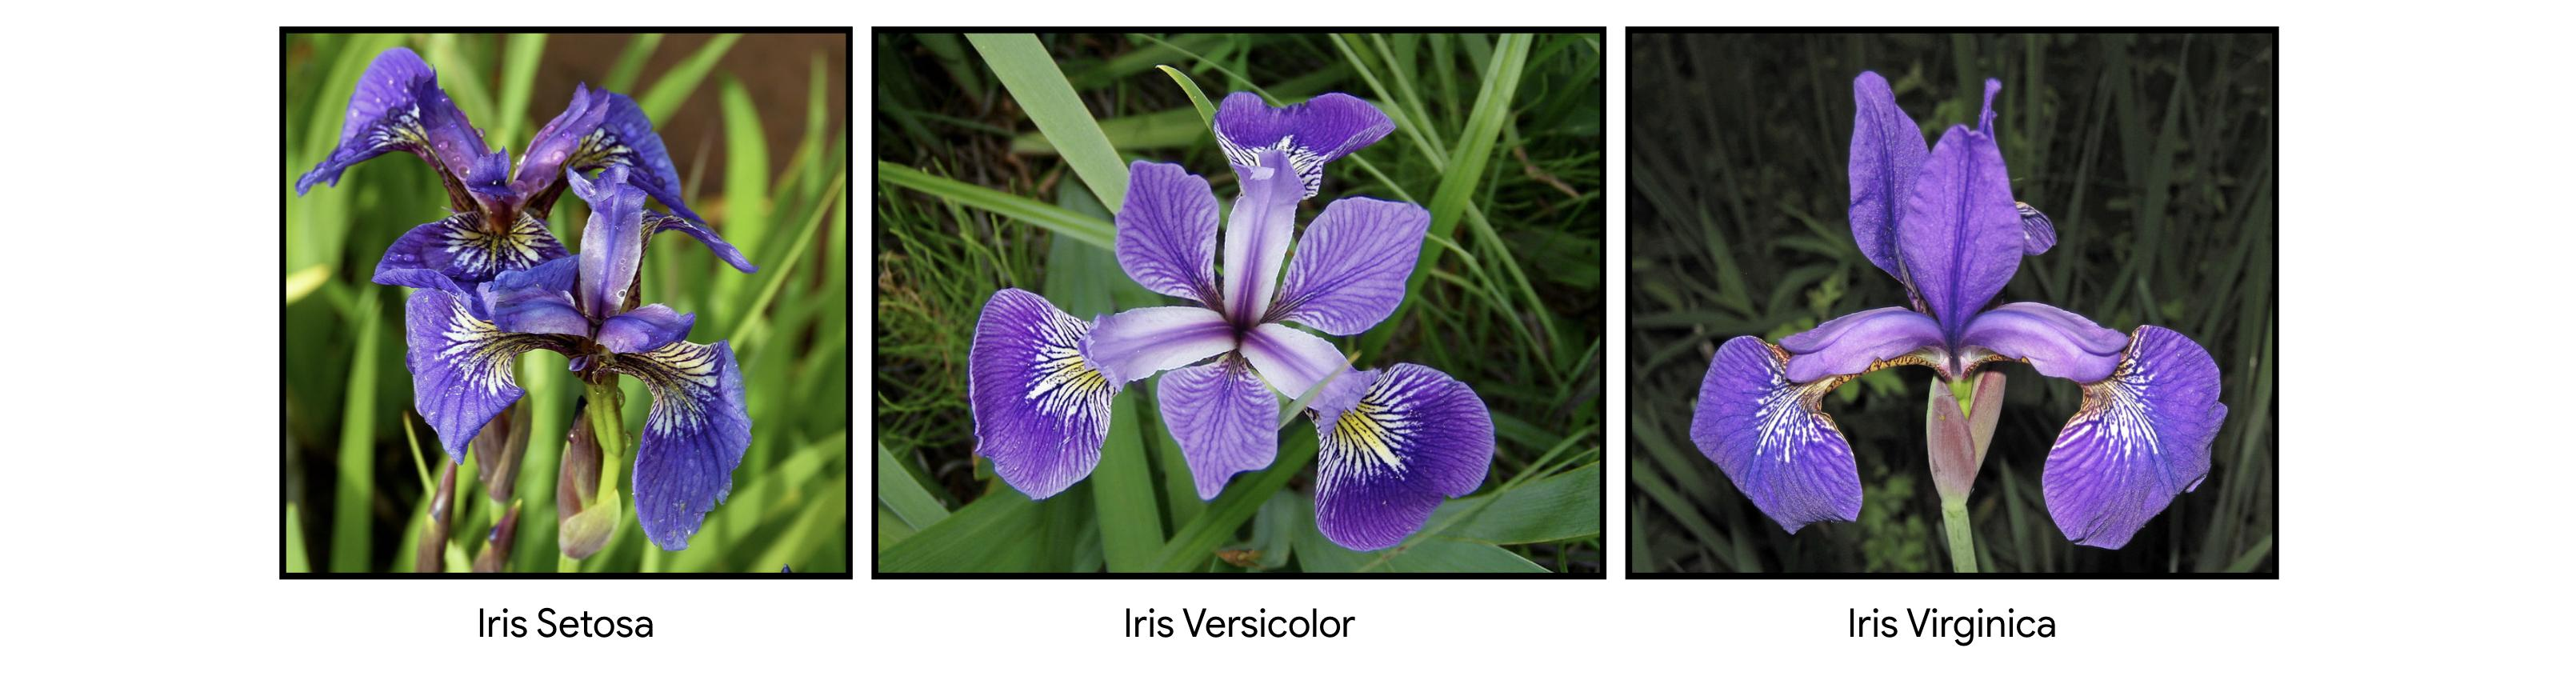

Patrzac na nie okiem laika, musze przyznac, ze rzeczywiscie wygladaja dosc ladnie i moga byc ozdoba kazdego ogrodu. I z tego co widze, potrzeba botanika-profesjonalisty, zeby je od siebie odroznic. 

Wracajac do naszych liczb, dysponujemy zbiorem danych, ktory zawiera 150 rekordow. Kazdy rekord to dane jednej rosliny. Dane te, to pomiary w centymetrach czterech cech: dlugosci i szerokosci platka kwiatu - **petal** oraz dlugosci i szerokosci dzialki kielicha - **sepal**. I znowu, abysmy wiedzieli o czym mowimy: platki kwiatu - **petal** to elementy, ktore znajduja sie wyzej, sa pachnace i ich funkcja jest przyciaganie owadow zapylajacych. Z kolei dzialki kielicha - **sepal**, znajduja sie ponizej. Sa twardsze i bardziej sztywne od platkow. Ich zadaniem w poczatkowej fazie jest ochrona paczka kwiatowego. Zas po otwarciu kwiatu, podtrzymuja jego platki w gorze, same wyginajac sie ku dolowi. Ponizszy obraz wyjasnia sytuacje:

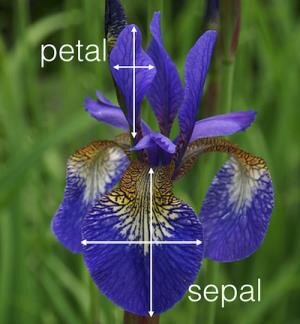

In [1]:
# sekcja importowa

import pandas as pd
import os
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# wczytanie bazy danych, tworzenie DataFrame

df = pd.read_csv('25__iris.csv', sep=",", encoding='utf8')

# 1.1 Wnioski plynace z analizy podstawowych informacji o danych:

Nasza baza rzeczywiscie zawiera 150 rekordow, po 50 na kazdy rodzaj gatunku irysa. W bazie mamy trzy i tylko trzy gatunki (Iris-setosa, Iris-versicolor i Iris-virginica). Oprocz kolumny klasa (gatunek irysa), mamy 4 kolumny zawierajace dane numeryczne: długość kielicha (sepal length), szerokość kielicha (sepal width), długość płatka (petal length) i szerokość płatka (petal width). Wielkosci te podane sa w centymetrach z dokladnoscia do 1 milimetra. Patrzac na wartosci unikatowe, widzimy ze wiekszosc liczb sie kilkukrotnie powtarza, co sugeruje, ze zebrane dane sa typowa probka. Dane sa kompletne, nie ma wartosci brakujacych, zatem nie bedzie potrzeby ich uzupelniania.

Patrzac na podstawowe statystyki, momentalnie widzimy gigantyczna rozpietosc (25-krotna roznica) pomiedzy wartoscia minimalna i maksymalna szerokosci platka kwiatowego (**petal width**). Rzut oka na pierwszy i trzeci kwartyl potwierdza, ze nie jest to anomalia pojedynczych danych, ale potezna prawidlowosc. Co wiecej, bardzo duze odchylenie standardowe mowi nam, ze dane w tym przypadku sa mocno rozproszone. Przyjrzymy sie im zatem pozniej bardziej szczegolowo.

Rowniez duze, choc juz nie tak gargantuiczne, bo tylko kilkukrotne roznice mozemy dostrzec w przypadku dlugosci platka (**petal length**). Jesli natomiast chodzi o sam kielich, to tutaj dane sa duzo bardziej skupione, a roznice niewielkie. Czyli nawet male kwiaty, z malymi platkami, sa chronione przez relatywnie duze kielichy. Co oznacza, ze dopuki dany kwiat sie nie otworzy, nie bedziemy mieli pojecia o wielkosci jego platkow. 

### Hipoteza:

Ciekawe, czy istnieje jakis zwiazek pomiedzy gatunkiem irysa, a wielkoscia jego kielicha lub platka? Sprawdzimy to analizujac posiadany zbior danych.

## 1.2 Analiza podstawowych informacji o danych:

In [3]:
# podstawowe informacje o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# lista kolumn
df.columns

Index(['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)',
       'długość płatka (petal length)', 'szerokość płatka (petal width)',
       'klasa (class)'],
      dtype='object')

In [5]:
# kilka losowych rekordow, zeby zorientowac sie z czym mamy do czynienia
df.sample(5)

długość kielicha (sepal length)  szerokość kielicha (sepal width)  \
47                               4.6                               3.2   
147                              6.5                               3.0   
80                               5.5                               2.4   
41                               4.5                               2.3   
145                              6.7                               3.0   

     długość płatka (petal length)  szerokość płatka (petal width)  \
47                             1.4                             0.2   
147                            5.2                             2.0   
80                             3.8                             1.1   
41                             1.3                             0.3   
145                            5.2                             2.3   

       klasa (class)  
47       Iris-setosa  
147   Iris-virginica  
80   Iris-versicolor  
41       Iris-setosa  
145   Iris-virginica

In [6]:
# sprawdzenie ilosci unikatowych wartosci
df.nunique()

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

In [7]:
# sprawdzenie brakujacych wartosci
df.isnull().sum()

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

In [8]:
# sprawdzenie liczby rekordow dla kazdego gatunku irysa
df['klasa (class)'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: klasa (class), dtype: int64

In [9]:
# podstawowe statystyki
df.describe().round(2).T

count  mean   std  min  25%   50%  75%  max
długość kielicha (sepal length)   150.0  5.84  0.83  4.3  5.1  5.80  6.4  7.9
szerokość kielicha (sepal width)  150.0  3.05  0.43  2.0  2.8  3.00  3.3  4.4
długość płatka (petal length)     150.0  3.76  1.76  1.0  1.6  4.35  5.1  6.9
szerokość płatka (petal width)    150.0  1.20  0.76  0.1  0.3  1.30  1.8  2.5

# 2.1 Wnioski z analizy pojedynczych zmiennych:

Analizujac posiadane dane, dla kazdego z gatunkow oddzielnie, od razu widzimy, ze gatunek **Iris-setosa** ma malutkie platki kwiatu, mieszcace sie w bardzo waskich zakresach. Zarowno jesli chodzi o ich dlugosc, jak i szerokosc. Dodatkowo, jego najdluzsze platki sa o przeszlo 50% krotsze od najkrotszych sposrod dwoch pozostalych gatunkow. Jesli zas chodzi o szerokosc platkow, to tu roznice sa jeszcze wieksze i siegaja niemal 100%. Na ponizszych wykresach widac to od razu. Zatem dosyc latwo przyjdzie nam wyodrebnic ten gatunek na podstawie pomiaru wielkosci (czy tez raczej 'malosci') jego platkow kwiatowych (**petal**). Mozemy zatem przyjac, ze irys o platkach kwiatu o dlugosci mniejszej niz 2.5 cm i szerokosci mniejszej niz 0.9 cm nalezy z pewnoscia do gatunku **Irys-setosa**.

Potwierdza to czesciowo nasza hipoteze o mozliwosci rozrozniania gatunkow dzieki pomiarom ich kwiatow. Niestety, w przypadku dwoch pozostalych gatunkow (**Irys-versicolor** i **Iris-virginica**), sprawa nie jest juz tak oczywista. Patrzac na wykresy ponizej mozemy jednak zauwazyc, ze gatunek **Iris-virginica** goruje zdecydowanie nad swoim kuzynem jesli chodzi o dlugosc i szerokosc platka kwiatowego.

### Hipoteza

Byc moze da sie rozroznic dwa pozostale gatunki irysa dzieki jakims zaleznosciom miedzy danymi. Na przyklad zupelnie rozna dla obu gatunkow moze byc proporcja dlugosci platka do jego szerokosci? Dlatego w nastepnym kroku przyjrzymy sie wszelkim zaleznosciom pomiedzy danymi. 

## 2.2 Analiza pojedynczych zmiennych:

In [10]:
# pogrupowanie danych wedlug gatunkow
pd.set_option('max_colwidth', None)
grouped = df.groupby('klasa (class)', as_index=False)

statystyki_gatunkami = grouped.agg(['mean', 'std', 'min', 'max']).round(2)
statystyki_gatunkami

długość kielicha (sepal length)                  \
                                           mean   std  min  max   
klasa (class)                                                     
Iris-setosa                                5.01  0.35  4.3  5.8   
Iris-versicolor                            5.94  0.52  4.9  7.0   
Iris-virginica                             6.59  0.64  4.9  7.9   

                szerokość kielicha (sepal width)                  \
                                            mean   std  min  max   
klasa (class)                                                      
Iris-setosa                                 3.42  0.38  2.3  4.4   
Iris-versicolor                             2.77  0.31  2.0  3.4   
Iris-virginica                              2.97  0.32  2.2  3.8   

                długość płatka (petal length)                  \
                                         mean   std  min  max   
klasa (class)                                                   
Iris-setosa                              1.46  0.17  1.0  1.9   
Iris-versicolor                          4.26  0.47  3.0  5.1   
Iris-virginica                           5.55  0.55  4.5  6.9   

                szerokość płatka (petal width)                  
                                          mean   std  min  max  
klasa (class)                                                   
Iris-setosa                               0.24  0.11  0.1  0.6  
Iris-versicolor                           1.33  0.20  1.0  1.8  
Iris-virginica                            2.03  0.27  1.4  2.5

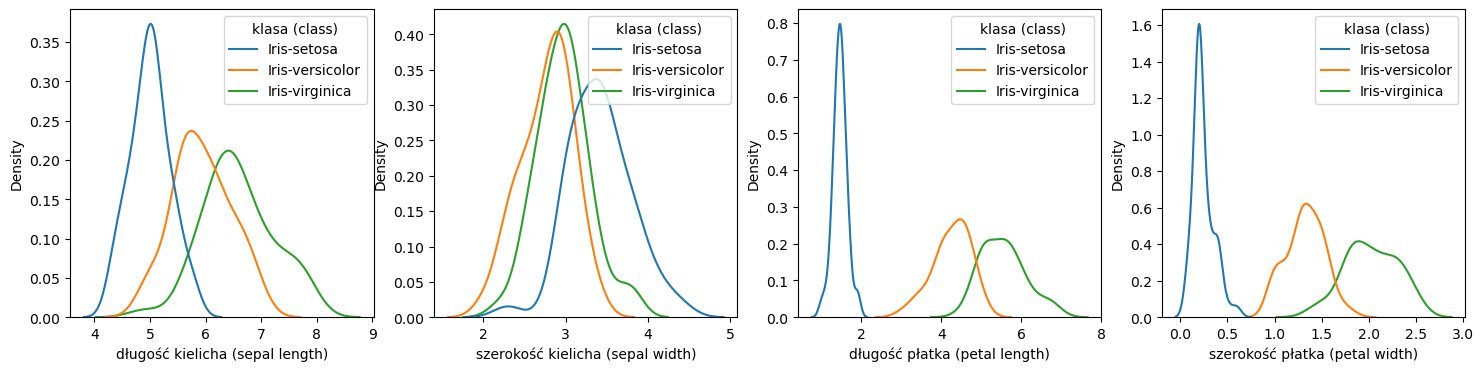

In [11]:
# tworzenie macierzy wykresow z 1 wierszem i 4 kolumnami
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
columns = df.columns[0:4]

# rysowanie linii KDE
for i, col in enumerate(columns):
    sns.kdeplot(data=df, x=col, hue=df.columns[4], ax=axes[i])

# 3.1 Wnioski z analizy zaleznosci pomiedzy danymi:

Dotychczas doszlismy do tego, jak wyodrebnic gatunek **Iris-setosa** z posiadanej probki. Ma on bowiem tak male platki kwiatowe, ze wystarczy w tym przypadku zastosowac jedynie proste kryterium wielkosci. Mozemy zatem podczas dalszej analizy skupic sie na dwoch pozostalych gatunkach irysa.

Zaczalem analize zaleznosci pomiedzy danymi troche nietypowo, bo od sprawdzenia wartosci odstajacych. Chcialem bowiem zorientowac sie, czy to czasem wlasnie nie te wartosci zaburzaja nam nasze postrzeganie posiadanych danych. Jednak rzut oka na boxploty wykazal, ze wartosci odstajace nie maja tu nic do rzeczy. Zarowno wielkosci platkow jak i kielicha dla gatunkow **Iris-versicolor** i **Iris-virginica** sa dosc zblizone. Przy czym, jesli chodzi o parametry kielicha, to wartosci te sa tak mocno przemieszane, ze ewentualna separacja jest raczej malo prawdopodobna. Za to w przypadku platkow widac mozliwe pole do dzialania.

Zeby miec jednak calkowita pewnosc, wygenerowalem scatterploty dotyczace wszystkich mozliwych par danych. Z obrazow ktore otrzymalismy, jasno widac, ze najbardziej obiecujaca para jest: dlugosc platka (petal length) i szerokosci platka (petal width). Powiekszylem wiec ten obraz usuwajac z niego dla czytelnosci gatunek **Iris-setosa**. Od razu rzucila mi sie w oczy mozliwosc zakreslenia obszarow zajmowanych tylko przez jeden gatunek. Wybralem najprostszy mozliwy wariant - prostokat.

Arbitralnie ustalilem jego granice na: od 0 do 1.7 cm dla szerokosci platka i od 0 do 5.1 cm dla dlugosci platka. W tym obszarze mieszcza sie wszystkie probki dla **Iris-versicolor** i jedynie 3 egzemplarze **Iris-virginica**. Uznalem, ze taki ok. 5% blad dla jednego gatunku i zerowy dla drugiego jest dosc obiecujacy. Oczywiscie przypominam, ze operujemy jedynie na probce 150 osobnikow. Mozliwe, ze w przypadku wiekszych ilosci trzeba bedzie zmodyfikowac granice wydzielonego przez nasz obszaru.

## 3.2 Analiza zaleznosci pomiedzy danymi:

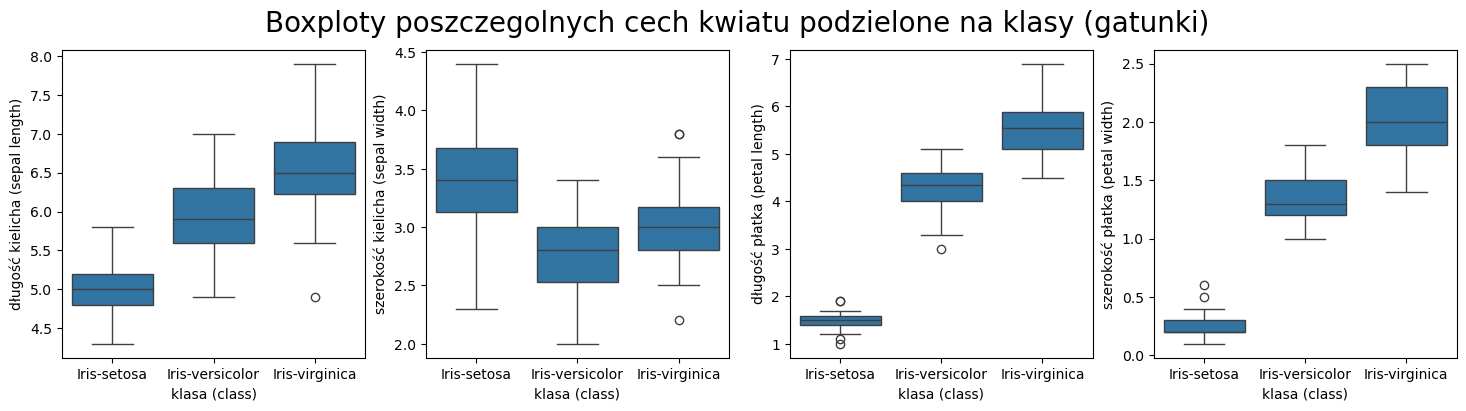

In [12]:
# tworzenie macierzy wykresow z 1 wierszem i 4 kolumnami

fig, axes = plt.subplots(1, 4, figsize=(18, 4))
columns = df.columns[0:4]
fig.suptitle('Boxploty poszczegolnych cech kwiatu podzielone na klasy (gatunki)', fontsize=20)

# rysowanie boxplotow
for i, col in enumerate(columns):
       sns.boxplot(x='klasa (class)', y=col, data=df, ax=axes[i])

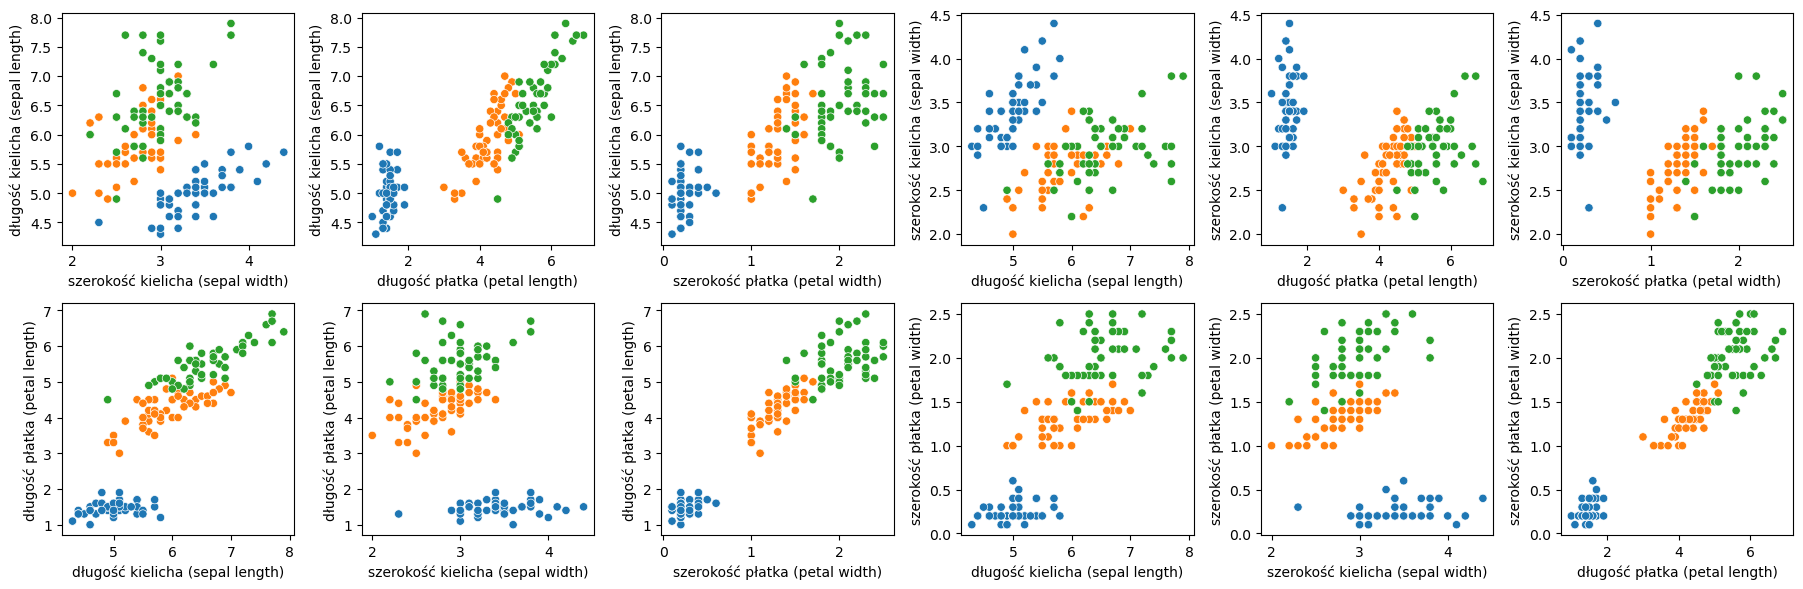

In [15]:
# tworzenie wszystkich mozliwych scatterplotow, zeby zobaczyc jak wyglada rozklad danych

# zmienna do sledzenia, ktory subplot program aktualnie rysuje
current_subplot = 1
hue = df['klasa (class)']
# tworzenie macierzy wykresow
fig, axs = plt.subplots(2, 6, figsize=(18, 6))

# rysowanie scatterplotow
for i, j in itertools.product(range(len(columns)), range(len(columns))):
    if i != j:
        ax = axs[(current_subplot - 1) // 6, (current_subplot - 1) % 6]
        sns.scatterplot(data=df, x=columns[j], y=columns[i], hue=hue, ax=ax, legend=False)
        current_subplot += 1
        if current_subplot > 12:
            break
    if current_subplot > 12:
        break
        
plt.tight_layout()
plt.show()

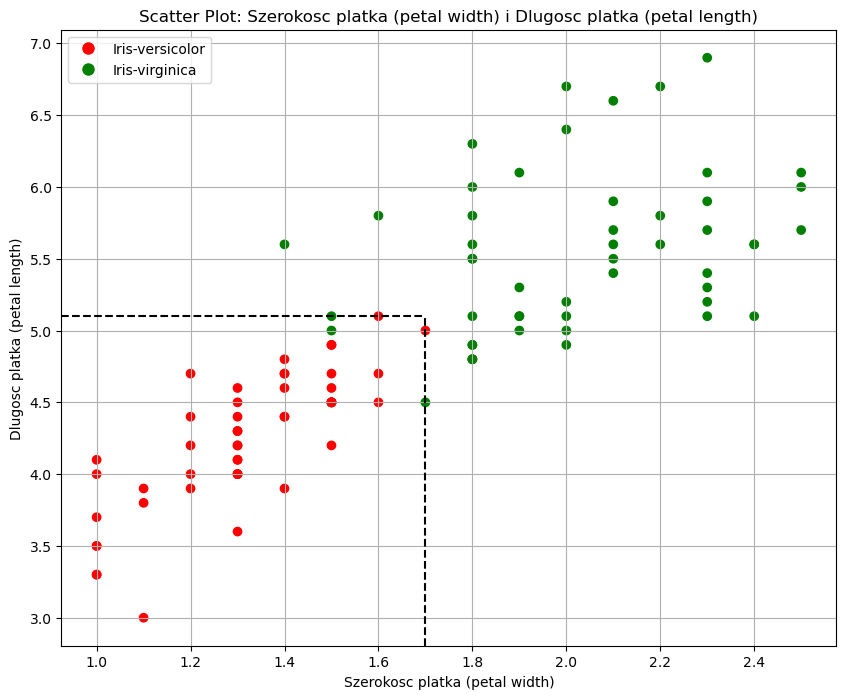

In [16]:
# tworzenie jednego, duzego wykresu scatterplot z wybrana para danych

plt.figure(figsize=(10, 8))

# odsiewanie z bazy 'Iris-setosa'
filtered_df = df[~df['klasa (class)'].isin(['Iris-setosa'])]

# agresywne i mocno kontrastowe kolorki
colors = {'Iris-versicolor': 'red', 'Iris-virginica': 'green'}

# rysowanie wykresu
plt.scatter(filtered_df['szerokość płatka (petal width)'], 
            filtered_df['długość płatka (petal length)'],  
            c=filtered_df['klasa (class)'].map(colors), 
            label=filtered_df['klasa (class)'])

# etykiety i tytul
plt.xlabel('Szerokosc platka (petal width)')
plt.ylabel('Dlugosc platka (petal length)')
plt.title('Scatter Plot: Szerokosc platka (petal width) i Dlugosc platka (petal length)')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in colors.items()])
plt.grid(True)

# pionowy odcinek od osi x dla wartosci 1.7 do wysokosci 5.1
plt.axvline(x=1.7, ymin=0, ymax=(5.1-plt.ylim()[0])/(plt.ylim()[1]-plt.ylim()[0]), color='black', linestyle='--')

# poziomy odcinek od osi y na wysokosci 5.1 do wartosci 1.7
plt.axhline(y=5.1, xmin=0, xmax=(1.7-plt.xlim()[0])/(plt.xlim()[1]-plt.xlim()[0]), color='black', linestyle='--')

plt.show()

In [17]:
# policzenie ilosci blednie zaklasyfikowanych danych

df[(df['długość płatka (petal length)'] <= 5.1) & (df['szerokość płatka (petal width)'] <= 1.7) & (df['klasa (class)'] == 'Iris-virginica')].value_counts()

długość kielicha (sepal length)  szerokość kielicha (sepal width)  długość płatka (petal length)  szerokość płatka (petal width)  klasa (class) 
4.9                              2.5                               4.5                            1.7                             Iris-virginica    1
6.0                              2.2                               5.0                            1.5                             Iris-virginica    1
6.3                              2.8                               5.1                            1.5                             Iris-virginica    1
dtype: int64

# 4.1 Koncowe wnioski z analizy danych:

Dysponujac zbiorem danych, zawierajacym informacje o trzech gatunkach irysow: **Iris setosa**, **Iris versicolor**, i **Iris virginica** (150 rekordow, po 50 na kazdy gatunek), przy czym dane te obejmowaly jedynie cztery cechy: dlugosc i szerokosc dzialki kielicha oraz dlugosc i szerokosc platka kwiatu (z dokladnoscia do 0.1 cm), gdzie kazdy rekord reprezentowal pojedynczy kwiat, udowodnilismy, ze da sie rozroznic kwiaty z probki na poszczegolne gatunki.

I tak, gatunek **Iris-setosa** ma platki kwiatu o dlugosci **<1 cm, 1.9 cm>** i szerokosci **<0.1 cm, 0.6 cm>**, **Iris-versicolor** ma platki o dlugosci **<3 cm, 5.1 cm>** i szerokosci **<1 cm, 1.7 cm>** zas pozostale egzemplarze naleza do gatunku **Iris-virginica**.

Przyjmujac dosc arbitralnie graniczna dlugosc platka na 5.1 cm oraz szerokosc 1.7 cm odseparowalismy 100% przedstawicieli gatunku **Iris-versicolor**. Jednak w tych wielkosciach znalazlo sie niestety rowniez trzech przedstawicieli gatunku **Iris-virginica**. Jednak blad wielkosci ok. 5% przy tak uproszczonej weryfikacji powinien byc uwazany za calkowicie dopuszczalny. Dodatkowo, w toku analizy okazalo sie, ze wielkosc kielicha kwiatu nie ma zadnego znaczenia dla rozroznienia miedzygatunkowego, gdyz jest dla wszystkich gatunkow praktycznie identyczna. Niniejszym postawiona na wstepie hipoteza o mozliwosci rozroznienia gatunkow dzieki zbiorowi posiadanych danych zostaje uznana za udowodniona.
**QED**

Na zakonczenie, ponizej, zaprezentowano schematyczne rysunki wszystkich trzech gatunkow. teraz od razu widac wystepujace miedzy nimi roznice :-)

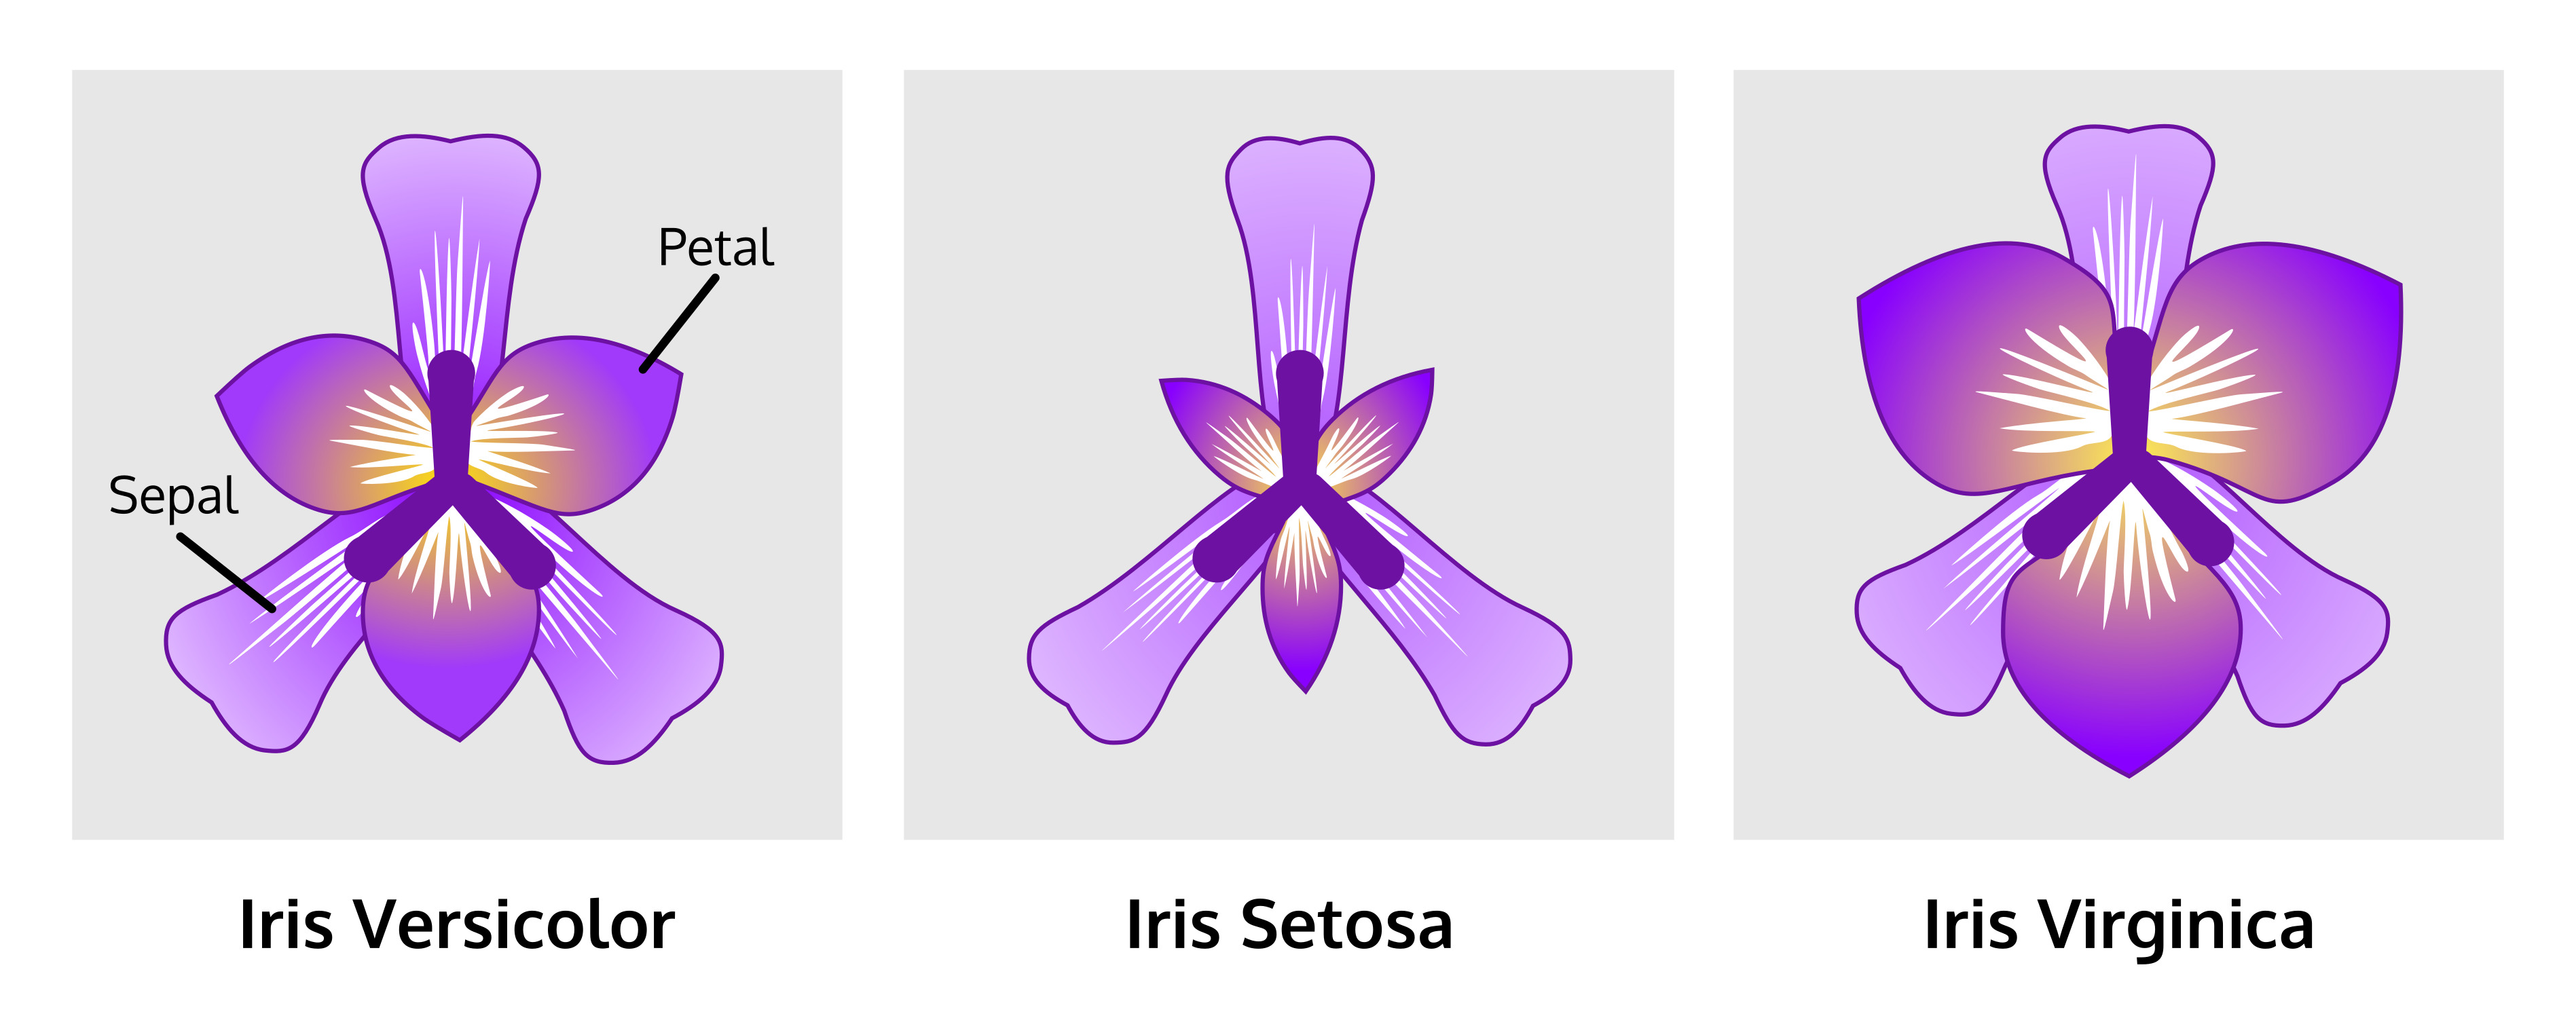